## Group member 2

### Subtask:
encoding categorical variables

Before Encoding:
 age         float64
sex          object
fare        float64
embarked     object
survived      int64
pclass        int64
sibsp         int64
parch         int64
dtype: object
    age     sex     fare embarked  survived  pclass  sibsp  parch
0  22.0    male   7.2500        S         0       3      1      0
1   NaN  female  71.2833        C         1       1      1      0
2  38.0  female   8.0000        S         1       3      0      0
3  26.0    male  35.5000        S         1       1      0      0
4  35.0    male  26.5500        C         0       2      0      0


FileNotFoundError: [Errno 2] No such file or directory: 'results/eda_visualizations/before_encoding_corr.png'

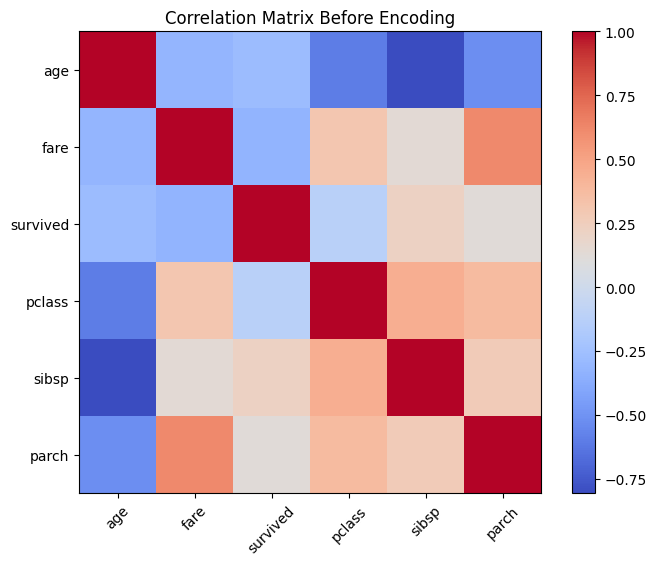

In [1]:
# Markdown: Explanation of Technique
# Encoding Categorical Variables: Converts non-numeric categories (e.g., 'sex', 'embarked') into numerical forms using one-hot encoding.
# Justification: ML models require numerical inputs. In this dataset, 'sex' and 'embarked' are nominal; encoding prevents ordinal assumptions and avoids errors in training.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to get the consistent dataset across all notebooks
def get_dataset():
    data = {
        'age': [22, np.nan, 38, 26, 35, np.nan, 54, 2, 27, 14],
        'sex': ['male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female'],
        'fare': [7.25, 71.2833, 8.0, 35.5, 26.55, 13.0, 53.1, 11.1333, 30.0708, 1000],
        'embarked': ['S', 'C', 'S', 'S', 'C', 'Q', 'S', 'S', 'C', 'S'],
        'survived': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
        'pclass': [3, 1, 3, 1, 2, 2, 1, 3, 2, 3],
        'sibsp': [1, 1, 0, 0, 0, 0, 0, 3, 0, 1],
        'parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 2]
    }
    return pd.DataFrame(data)

df = get_dataset()

# Before encoding: Show data types and sample
print("Before Encoding:\n", df.dtypes)
print(df.head())

# Visualization before: Correlation matrix (limited insight due to categoricals)
corr_before = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_before, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_before.columns)), corr_before.columns, rotation=45)
plt.yticks(range(len(corr_before.columns)), corr_before.columns)
plt.title('Correlation Matrix Before Encoding')
plt.savefig('results/eda_visualizations/before_encoding_corr.png')
plt.show()

# Implementation: One-hot encoding for categorical variables
# Step 1: Identify categorical columns
categorical_cols = ['sex', 'embarked']
# Step 2: Apply one-hot encoding (get_dummies creates binary columns)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first to avoid multicollinearity
# Step 3: Show after
print("After Encoding:\n", df_encoded.dtypes)
print(df_encoded.head())

# Visualization after: Updated correlation matrix (now includes encoded features)
corr_after = df_encoded.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_after, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_after.columns)), corr_after.columns, rotation=45)
plt.yticks(range(len(corr_after.columns)), corr_after.columns)
plt.title('Correlation Matrix After Encoding')
plt.savefig('results/eda_visualizations/after_encoding_corr.png')
plt.show()

# Interpretation: The correlation matrix after encoding shows new relationships (e.g., sex_male correlates negatively with survived, indicating males had lower survival). This helps in feature importance for ML models.

**Reasoning**:
Identify and encode categorical variables in the DataFrame.

